## Assignment 

#### Q(1) Explore Linear Discriminant Analysis(LDA) by visiting the website of scikit Learn.
####  Q(2) Use LDA to classify wines using Wine dataset on Training data
#### Q(3) Carryout Comparative analysis of different classification methods for classifying wine in to one of three categories.

### Implementing LDA with Scikit-Learn


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
wine=datasets.load_wine()
X=wine.data
y=wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 854987)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [4]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[19  0  0]
 [ 6 22  1]
 [ 0  0 11]]
Accuracy0.8813559322033898


In [6]:
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_wine
  
# instantiating
cancer = load_wine()
  
# creating dataframe
df = pd.DataFrame(wine['data'], columns = wine['feature_names'])
  
# checking head of dataframe
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
  
scalar = StandardScaler()
  
# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second Principal Component')

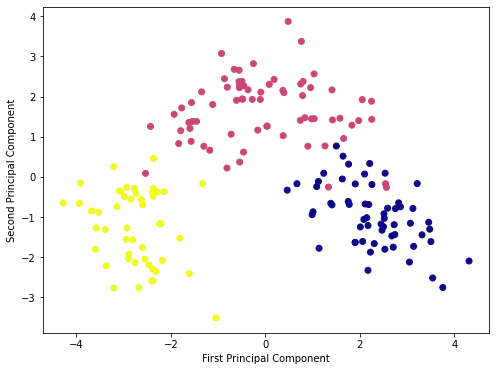

In [8]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [9]:
# components
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

<AxesSubplot:>

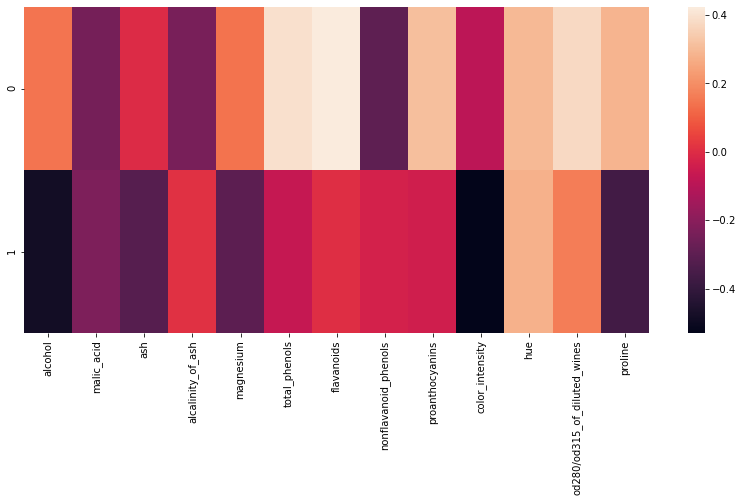

In [10]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)